In [1]:
import rosbag
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import cv2
import numpy as np
import rospy
import matplotlib.pyplot as plt

In [3]:
# def extract_images_from_bag(bag_file, output_folder, topic='/zed/zed_node/rgb_raw/image_raw_color/compressed', frequency=1):
#     bag = rosbag.Bag(bag_file, 'r')
#     bridge = CvBridge()
#     image_count = 0

#     for topic, msg, t in bag.read_messages(topics=[topic]):
#         image_count += 1
#         compressed_data = msg.data
#         np_arr = np.frombuffer(compressed_data, np.uint8)
#         cv_image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

#         # 在这里可以对图像进行处理或保存
#         image_filename = f"{output_folder}/image_{image_count}.png"
#         cv2.imwrite(image_filename, cv_image)
#     bag.close()

# if __name__ == '__main__':
#     bag_file = '/home/kemove/delta_project/bag/2024-03-08-14-06-19.bag'
#     output_folder = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/images_test'
#     extract_images_from_bag(bag_file, output_folder)

In [8]:
import rosbag
import cv2
from cv_bridge import CvBridge
from ros_numpy.image import image_to_numpy

def extract_images_from_bag(bag_file, output_folder, topic='/zed2i/zed_node/left/image_rect_color', frequency=1):
    bag = rosbag.Bag(bag_file, 'r')
    bridge = CvBridge()

    image_count = 406*5
    for topic, msg, t in bag.read_messages(topics=[topic]):
        cv_image = image_to_numpy(msg)

        # Check if the image count is divisible by 15
        if image_count % 5 == 0:
            # You can perform image processing or saving here
            image_filename = f"{output_folder}/{image_count // 5}.png"
            cv2.imwrite(image_filename, cv_image)
        image_count += 1
    bag.close()

if __name__ == '__main__':
    bag_file = '/media/kemove/boot/home/amov/delta/2024-03-08-14-04-48.bag'
    output_folder = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/image_new'
    extract_images_from_bag(bag_file, output_folder)


In [12]:
import rosbag
import cv2
from cv_bridge import CvBridge
from ros_numpy.image import image_to_numpy

def extract_images_from_bag(bag_file, output_folder, topic='/zed2i/zed_node/rgb/image_rect_color/compressed', frequency=1):
    bag = rosbag.Bag(bag_file, 'r')
    bridge = CvBridge()

    image_count = 0
    for topic, msg, t in bag.read_messages(topics=[topic]):
        compressed_data = msg.data
        np_arr = np.frombuffer(compressed_data, np.uint8)
        cv_image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

        # Check if the image count is divisible by 15
        if image_count % 10 == 0:
            # You can perform image processing or saving here
            image_filename = f"{output_folder}/dark_{image_count // 10}.png"
            cv2.imwrite(image_filename, cv_image)
        image_count += 1
    bag.close()

if __name__ == '__main__':
    bag_file = '/media/kemove/boot/home/amov/evening_bag/2024-02-17-21-28-00.bag'
    output_folder = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/image_dark'
    extract_images_from_bag(bag_file, output_folder)


In [4]:
import os
import shutil

def keep_fraction_of_images(input_folder):
    image_files = sorted(os.listdir(input_folder), key=lambda x: int(x.split('_')[1].split('.')[0]))

    # 保留每隔15个的图片
    selected_images = [image_files[i] for i in range(0, len(image_files), 15)]
    print(selected_images)

    # 删除未选中的图片
    for image_file in image_files:
        if image_file not in selected_images:
            file_path = os.pa
            th.join(input_folder, image_file)
            os.remove(file_path)

if __name__ == '__main__':
    input_folder = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/images_test'
    keep_fraction_of_images(input_folder)

['image_1.png', 'image_16.png', 'image_31.png', 'image_46.png', 'image_61.png', 'image_76.png', 'image_91.png', 'image_106.png', 'image_121.png', 'image_136.png', 'image_151.png', 'image_166.png', 'image_181.png', 'image_196.png', 'image_211.png', 'image_226.png', 'image_241.png', 'image_256.png', 'image_271.png', 'image_286.png', 'image_301.png', 'image_316.png', 'image_331.png', 'image_346.png', 'image_361.png', 'image_376.png', 'image_391.png', 'image_406.png', 'image_421.png', 'image_436.png', 'image_451.png', 'image_466.png', 'image_481.png', 'image_496.png', 'image_511.png', 'image_526.png', 'image_541.png', 'image_556.png', 'image_571.png', 'image_586.png', 'image_601.png', 'image_616.png', 'image_631.png', 'image_646.png', 'image_661.png', 'image_676.png', 'image_691.png', 'image_706.png', 'image_721.png', 'image_736.png', 'image_751.png', 'image_766.png', 'image_781.png', 'image_796.png', 'image_811.png', 'image_826.png', 'image_841.png', 'image_856.png', 'image_871.png', 'ima

In [16]:
import os

def rename_images(input_folder):
    image_files = sorted(os.listdir(input_folder), key=lambda x: int(x.split('_')[1][:-4]))
    for i, image_file in enumerate(image_files):
        old_path = os.path.join(input_folder, image_file)
        new_filename = f"dark_{i}.png"
        new_path = os.path.join(input_folder, new_filename)

        os.rename(old_path, new_path)
        print(f"Renamed {image_file} to {new_filename}.")

if __name__ == '__main__':
    input_folder = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/image_dark'
    rename_images(input_folder)


Renamed dark_0.png to dark_0.png.
Renamed dark_1.png to dark_1.png.
Renamed dark_2.png to dark_2.png.
Renamed dark_3.png to dark_3.png.
Renamed dark_4.png to dark_4.png.
Renamed dark_5.png to dark_5.png.
Renamed dark_6.png to dark_6.png.
Renamed dark_7.png to dark_7.png.
Renamed dark_8.png to dark_8.png.
Renamed dark_9.png to dark_9.png.
Renamed dark_10.png to dark_10.png.
Renamed dark_11.png to dark_11.png.
Renamed dark_12.png to dark_12.png.
Renamed dark_13.png to dark_13.png.
Renamed dark_14.png to dark_14.png.
Renamed dark_15.png to dark_15.png.
Renamed dark_16.png to dark_16.png.
Renamed dark_17.png to dark_17.png.
Renamed dark_18.png to dark_18.png.
Renamed dark_19.png to dark_19.png.
Renamed dark_20.png to dark_20.png.
Renamed dark_21.png to dark_21.png.
Renamed dark_110.png to dark_22.png.
Renamed dark_111.png to dark_23.png.
Renamed dark_112.png to dark_24.png.
Renamed dark_113.png to dark_25.png.
Renamed dark_114.png to dark_26.png.
Renamed dark_115.png to dark_27.png.
Rename

In [10]:
# import os

# def rename_images(input_folder):
# #     image_files = sorted(os.listdir(input_folder), key=lambda x: int(x.split('.')[0]))
#     image_files = sorted(os.listdir(input_folder), key=lambda x: int(x.split('_')[0]))
#     for i, image_file in enumerate(image_files):
#         old_path = os.path.join(input_folder, image_file)
#         new_filename = f"{i}.png"
#         new_path = os.path.join(input_folder, new_filename)

#         os.rename(old_path, new_path)
#         print(f"Renamed {image_file} to {new_filename}.")

# if __name__ == '__main__':
#     input_folder = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/transfer_label'
#     rename_images(input_folder)

### Data labeling

In [3]:
# only use this one
import os
import json
import numpy as np
from PIL import Image, ImageDraw

def labelme_to_cityscape(labelme_json_path, cityscape_save_path, label_colors):
    with open(labelme_json_path, 'r') as json_file:
        data = json.load(json_file)

    img_width = data['imageWidth']
    img_height = data['imageHeight']
    img_filename = data['imagePath']
    
    label_img = np.zeros((img_height, img_width), dtype=np.uint8)

    for shape in data['shapes']:
        label = shape['label']
        points = shape['points']
        polygon = [(int(x), int(y)) for x, y in points]

        mask = Image.new('L', (img_width, img_height), 0)
        ImageDraw.Draw(mask).polygon(polygon, outline=1, fill=1)
        mask = np.array(mask)

        label_img[mask > 0] = label_colors[label]

    label_img = Image.fromarray(label_img)
    label_img.save(cityscape_save_path)

def process_directory(input_dir, output_dir, label_colors):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".json"):
            labelme_json_path = os.path.join(input_dir, filename)
            cityscape_save_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".png")
            labelme_to_cityscape(labelme_json_path, cityscape_save_path, label_colors)

if __name__ == "__main__":
    # Replace these values with your own paths and label colors
    input_directory = "/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/label_new"
    output_directory = "/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/transfer_new"
    
    # Define label colors based on Cityscape dataset
    label_colors = {
        "background": 0,
        "road": 1,
#         "edge": 2,
        # Add more labels as needed
    }

    process_directory(input_directory, output_directory, label_colors)


In [4]:
a = cv2.imread('/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/transfer_new/0_new.png')

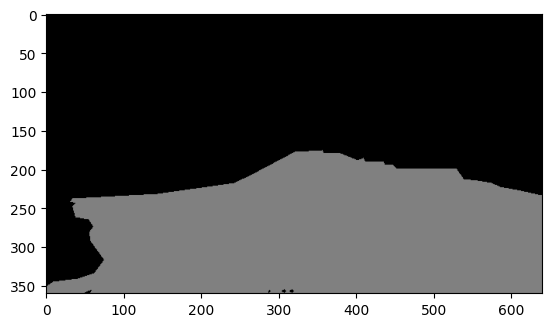

In [5]:
plt.imshow(a*128)

In [1]:
# json_to_dataset_labelme.py
import argparse
import base64
import json
import os
import os.path as osp
 
import imgviz
import PIL.Image
from labelme import utils
from labelme.logger import logger
 
 
def convert_json_files(input_folder, output_folder=None):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".json"):
                json_file_path = osp.join(root, file)
                convert_single_json(json_file_path, output_folder)
 
 
def convert_single_json(json_file, output_folder=None):
    logger.warning(
        "DEPRECATED: This script will be removed in the near future. "
        "Please use `labelme_export_json` instead."
    )
    logger.warning(
        "NOTE: This script is aimed to demonstrate how to convert a JSON file "
        "to a single image dataset. so it won't handle multiple JSON files to "
        "generate a real-use dataset."
    )
 
    # 获取 JSON 文件的文件名（不包括扩展名）
    json_file_name = osp.splitext(osp.basename(json_file))[0]
 
    if output_folder is None:
        out_dir = osp.join(osp.dirname(json_file), json_file_name)
    else:
        out_dir = osp.join(output_folder, json_file_name)
    if not osp.exists(out_dir):
        os.mkdir(out_dir)
 
    # if output_folder is None:
    #     out_dir = osp.basename(json_file).replace(".", "_")
    #     out_dir = osp.join(osp.dirname(json_file), out_dir)
    # else:
    #     out_dir = output_folder
    # if not osp.exists(out_dir):
    #     os.mkdir(out_dir)
 
    data = json.load(open(json_file))
    imageData = data.get("imageData")
 
    if not imageData:
        imagePath = os.path.join(os.path.dirname(json_file), data["imagePath"])
        with open(imagePath, "rb") as f:
            imageData = f.read()
            imageData = base64.b64encode(imageData).decode("utf-8")
    img = utils.img_b64_to_arr(imageData)
 
    label_name_to_value = {"_background_": 0, "road": 1,"edge":2}
    for shape in sorted(data["shapes"], key=lambda x: x["label"]):
        label_name = shape["label"]
        if label_name in label_name_to_value:
            label_value = label_name_to_value[label_name]
        else:
            label_value = len(label_name_to_value)
            label_name_to_value[label_name] = label_value
    lbl, _ = utils.shapes_to_label(
        img.shape, data["shapes"], label_name_to_value
    )
 
    label_names = [None] * (max(label_name_to_value.values()) + 1)
    for name, value in label_name_to_value.items():
        label_names[value] = name
 
    lbl_viz = imgviz.label2rgb(
        lbl, imgviz.asgray(img), label_names=label_names, loc="rb"
    )
 
    PIL.Image.fromarray(img).save(osp.join(out_dir, "img.png"))
    utils.lblsave(osp.join(out_dir, "label.png"), lbl)
    PIL.Image.fromarray(lbl_viz).save(osp.join(out_dir, "label_viz.png"))
 
    with open(osp.join(out_dir, "label_names.txt"), "w") as f:
        for lbl_name in label_names:
            f.write(lbl_name + "\n")
 
    logger.info(f"Saved to: {out_dir}")
 
 
def main():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("input", help="Input folder containing JSON files or a single JSON file")
#     parser.add_argument("-o", "--out", default=None, help="Output folder for converted images")
#     args = parser.parse_args()
 
    input_path = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/before'
    output_path = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2'
 
    if os.path.isdir(input_path):
        convert_json_files(input_path, output_path)
    elif os.path.isfile(input_path):
        convert_single_json(input_path, output_path)
    else:
        logger.error("Invalid input path. Please provide a valid file or folder path.")
 
 
if __name__ == "__main__":
    main()

2024-01-19 15:12:00,326 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:00,326 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:00,396 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/197
2024-01-19 15:12:00,397 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:00,397 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:00,993 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:01,051 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/288
2024-01-19 15:12:01,051 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:01,051 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:01,121 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/674
202

2024-01-19 15:12:01,758 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/4
2024-01-19 15:12:01,759 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:01,759 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:01,838 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/38
2024-01-19 15:12:01,838 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:01,838 [WARNING] 1605966931:convert_single_json:27- NO

2024-01-19 15:12:02,496 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:02,497 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:02,554 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/252
2024-01-19 15:12:02,554 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:02,555 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:03,175 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:03,221 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/123
2024-01-19 15:12:03,222 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:03,222 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:03,279 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/204
202

2024-01-19 15:12:03,904 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/279
2024-01-19 15:12:03,904 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:03,904 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:03,952 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/87
2024-01-19 15:12:03,953 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:03,953 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:04,599 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:04,600 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:04,654 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/351
2024-01-19 15:12:04,654 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:04,654 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:05,343 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:05,427 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/29
2024-01-19 15:12:05,427 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:05,427 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:05,504 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/600
2024

2024-01-19 15:12:06,189 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/35
2024-01-19 15:12:06,189 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:06,189 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:06,234 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/117
2024-01-19 15:12:06,235 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:06,235 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:06,827 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:06,827 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:06,887 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/236
2024-01-19 15:12:06,888 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:06,888 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:07,528 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:07,588 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/226
2024-01-19 15:12:07,588 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:07,588 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:07,640 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/161
202

2024-01-19 15:12:08,287 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/647
2024-01-19 15:12:08,287 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:08,287 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:08,364 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/73
2024-01-19 15:12:08,364 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:08,364 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:08,996 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:08,997 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:09,048 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/155
2024-01-19 15:12:09,048 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:09,048 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:09,696 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:09,757 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/295
2024-01-19 15:12:09,758 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:09,758 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:09,822 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/446
202

2024-01-19 15:12:10,487 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/84
2024-01-19 15:12:10,488 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:10,488 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:10,554 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/671
2024-01-19 15:12:10,554 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:10,555 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:11,182 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:11,182 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:11,240 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/356
2024-01-19 15:12:11,240 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:11,241 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:11,905 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:11,969 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/420
2024-01-19 15:12:11,970 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:11,970 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:12,038 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/497
202

2024-01-19 15:12:12,672 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/53
2024-01-19 15:12:12,672 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:12,673 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:12,724 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/160
2024-01-19 15:12:12,725 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:12,725 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:13,364 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:13,364 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:13,428 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/416
2024-01-19 15:12:13,428 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:13,429 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:14,045 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:14,105 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/215
2024-01-19 15:12:14,106 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:14,106 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:14,165 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/196
202

2024-01-19 15:12:14,778 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/407
2024-01-19 15:12:14,779 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:14,779 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:14,846 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/494
2024-01-19 15:12:14,846 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:14,847 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:15,515 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:15,515 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:15,597 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/45
2024-01-19 15:12:15,597 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:15,597 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19

2024-01-19 15:12:16,259 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:16,317 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/564
2024-01-19 15:12:16,318 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:16,318 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:16,376 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/358
202

2024-01-19 15:12:17,054 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/650
2024-01-19 15:12:17,054 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:17,055 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:17,118 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/339
2024-01-19 15:12:17,118 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:17,119 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:17,742 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:17,742 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:17,797 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/207
2024-01-19 15:12:17,797 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:17,798 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:18,410 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:18,465 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/95
2024-01-19 15:12:18,465 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:18,466 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:18,524 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/547
2024

2024-01-19 15:12:19,184 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/364
2024-01-19 15:12:19,184 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:19,185 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:19,249 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/361
2024-01-19 15:12:19,249 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:19,250 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:19,869 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:19,870 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:19,935 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/501
2024-01-19 15:12:19,936 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:19,936 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:20,575 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:20,644 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/70
2024-01-19 15:12:20,645 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:20,645 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:20,708 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/436
2024

2024-01-19 15:12:21,296 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/465
2024-01-19 15:12:21,296 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:21,296 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:21,357 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/450
2024-01-19 15:12:21,357 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:21,358 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:21,978 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:21,978 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:22,026 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/162
2024-01-19 15:12:22,027 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:22,027 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:22,648 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:22,712 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/275
2024-01-19 15:12:22,712 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:22,713 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:22,771 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/300
202

2024-01-19 15:12:23,385 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/314
2024-01-19 15:12:23,385 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:23,385 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:23,432 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/108
2024-01-19 15:12:23,432 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:23,433 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:24,064 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:24,064 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:24,121 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/191
2024-01-19 15:12:24,122 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:24,122 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:24,778 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:24,848 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/80
2024-01-19 15:12:24,848 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:24,849 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:24,908 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/479
2024

2024-01-19 15:12:25,571 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/55
2024-01-19 15:12:25,571 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:25,571 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:25,628 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/291
2024-01-19 15:12:25,629 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:25,629 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:26,222 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:26,222 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:26,285 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/395
2024-01-19 15:12:26,285 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:26,285 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:26,891 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:26,951 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/557
2024-01-19 15:12:26,952 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:26,952 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:27,033 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/33
2024

2024-01-19 15:12:27,692 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/502
2024-01-19 15:12:27,693 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:27,693 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:27,755 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/237
2024-01-19 15:12:27,755 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:27,755 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:28,403 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:28,404 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:28,451 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/121
2024-01-19 15:12:28,451 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:28,452 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:29,075 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:29,122 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/147
2024-01-19 15:12:29,122 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:29,123 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:29,187 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/434
202

2024-01-19 15:12:29,796 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/242
2024-01-19 15:12:29,796 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:29,797 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:29,860 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/426
2024-01-19 15:12:29,860 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:29,860 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:30,464 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:30,464 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:30,546 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/37
2024-01-19 15:12:30,547 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:30,547 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19

2024-01-19 15:12:31,125 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:31,206 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/21
2024-01-19 15:12:31,207 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:31,207 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:31,267 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/537
2024

2024-01-19 15:12:31,917 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/96
2024-01-19 15:12:31,917 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:31,918 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:31,994 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/68
2024-01-19 15:12:31,994 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:31,995 [WARNING] 1605966931:convert_single_json:27- N

2024-01-19 15:12:32,577 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:32,577 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:32,635 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/473
2024-01-19 15:12:32,636 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:32,636 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:33,278 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:33,342 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/277
2024-01-19 15:12:33,342 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:33,343 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:33,399 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/251
202

2024-01-19 15:12:34,065 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/317
2024-01-19 15:12:34,065 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:34,065 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:34,144 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/20
2024-01-19 15:12:34,144 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:34,144 [WARNING] 1605966931:convert_single_json:27- 

2024-01-19 15:12:34,784 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:34,784 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:34,851 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/336
2024-01-19 15:12:34,851 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:34,851 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:35,503 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:35,583 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/43
2024-01-19 15:12:35,583 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:35,584 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:35,663 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/63
2024-

2024-01-19 15:12:36,219 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/456
2024-01-19 15:12:36,220 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:36,220 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:36,281 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/245
2024-01-19 15:12:36,281 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:36,282 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:36,938 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:36,939 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:37,008 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/681
2024-01-19 15:12:37,008 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:37,009 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:37,643 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:37,703 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/247
2024-01-19 15:12:37,703 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:37,704 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:37,759 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/526
202

2024-01-19 15:12:38,435 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/506
2024-01-19 15:12:38,436 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:38,436 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:38,499 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/423
2024-01-19 15:12:38,499 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:38,499 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:39,126 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:39,126 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:39,174 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/119
2024-01-19 15:12:39,174 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:39,175 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:39,761 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:39,808 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/104
2024-01-19 15:12:39,809 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:39,809 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:39,869 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/393
202

2024-01-19 15:12:40,488 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/264
2024-01-19 15:12:40,488 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:40,489 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:40,547 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/524
2024-01-19 15:12:40,548 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:40,548 [WARNING] 1605966931:convert_single_json:27-

2024-01-19 15:12:41,191 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:41,191 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:41,252 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/440
2024-01-19 15:12:41,252 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:41,253 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:41,883 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:41,961 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/15
2024-01-19 15:12:41,962 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:41,962 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:42,022 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/516
2024

2024-01-19 15:12:42,622 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/5
2024-01-19 15:12:42,622 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:42,622 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:42,687 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/540
2024-01-19 15:12:42,687 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:42,688 [WARNING] 1605966931:convert_single_json:27- N

2024-01-19 15:12:43,268 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:43,268 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:43,331 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/413
2024-01-19 15:12:43,331 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:43,331 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-1

2024-01-19 15:12:43,981 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:44,050 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/652
2024-01-19 15:12:44,051 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:44,051 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:44,097 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/140
202

2024-01-19 15:12:44,771 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/64
2024-01-19 15:12:44,771 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:44,771 [WARNING] 1605966931:convert_single_json:27- NOTE: This script is aimed to demonstrate how to convert a JSON file to a single image dataset. so it won't handle multiple JSON files to generate a real-use dataset.
2024-01-19 15:12:44,823 [INFO   ] 1605966931:convert_single_json:89- Saved to: /home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2/311
2024-01-19 15:12:44,823 [WARNING] 1605966931:convert_single_json:23- DEPRECATED: This script will be removed in the near future. Please use `labelme_export_json` instead.
2024-01-19 15:12:44,824 [WARNING] 1605966931:convert_single_json:27- 

In [4]:
# gtFine_labelids.py
import os
import cv2
 
json_path = '/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/other/output2'
for root, dirs, files in os.walk(json_path):
    for file in files:
        if file.strip() == "label.png":
            file_path = os.path.join(root, file)
 
            src_image_path = os.path.join(root, 'img.png')
 
            image = cv2.imread(file_path)
            src = cv2.imread(src_image_path)
 
            folder_name = os.path.split(root)[-1]
            file_name = folder_name + '_' + file.split('_')[0] + '.png'
 
            # label处理  直接取R通道的图像就是gtFine
            B, G, R = cv2.split(image)
 
            path = os.path.join(os.path.abspath('.'), 'gtFine')
            if not os.path.exists(path):
                os.makedirs(path)
 
            labelId_image = os.path.join(path, file_name.split('.')[0] + '_gtFine_labelIds.' + file_name.split('.')[-1])
            print(labelId_image)
            cv2.imwrite(labelId_image, R)
 
            src_image_path = os.path.join(os.path.abspath('.'), 'leftImg8bit')
            if not os.path.exists(src_image_path):
                os.makedirs(src_image_path)
 
            # 保存原始图像
            src_image = os.path.join(src_image_path, file_name)
            cv2.imwrite(src_image, src)
 
            # 保存原始图像的 R 通道
            # src_image = os.path.join(src_image_path, file_name)
            # cv2.imwrite(src_image, R)
 
            print(file_name)

/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/146_label_gtFine_labelIds.png
146_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/537_label_gtFine_labelIds.png
537_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/548_label_gtFine_labelIds.png
548_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/568_label_gtFine_labelIds.png
568_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/650_label_gtFine_labelIds.png
650_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/337_label_gtFine_labelIds.png
337_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/411_label_gtFine_labelIds.png
411_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/409_label_gtFine_labelIds.png
409_label.

/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/509_label_gtFine_labelIds.png
509_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/285_label_gtFine_labelIds.png
285_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/690_label_gtFine_labelIds.png
690_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/391_label_gtFine_labelIds.png
391_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/196_label_gtFine_labelIds.png
196_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/72_label_gtFine_labelIds.png
72_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/263_label_gtFine_labelIds.png
263_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/381_label_gtFine_labelIds.png
381_label.pn

421_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/609_label_gtFine_labelIds.png
609_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/585_label_gtFine_labelIds.png
585_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/589_label_gtFine_labelIds.png
589_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/50_label_gtFine_labelIds.png
50_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/665_label_gtFine_labelIds.png
665_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/494_label_gtFine_labelIds.png
494_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/272_label_gtFine_labelIds.png
272_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/219_label_gtFine_labelId

666_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/667_label_gtFine_labelIds.png
667_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/671_label_gtFine_labelIds.png
671_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/557_label_gtFine_labelIds.png
557_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/503_label_gtFine_labelIds.png
503_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/475_label_gtFine_labelIds.png
475_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/328_label_gtFine_labelIds.png
328_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/3_label_gtFine_labelIds.png
3_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/527_label_gtFine_labelIds.

238_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/657_label_gtFine_labelIds.png
657_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/88_label_gtFine_labelIds.png
88_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/299_label_gtFine_labelIds.png
299_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/502_label_gtFine_labelIds.png
502_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/462_label_gtFine_labelIds.png
462_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/116_label_gtFine_labelIds.png
116_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/476_label_gtFine_labelIds.png
476_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/464_label_gtFine_labelId

186_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/17_label_gtFine_labelIds.png
17_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/477_label_gtFine_labelIds.png
477_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/103_label_gtFine_labelIds.png
103_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/46_label_gtFine_labelIds.png
46_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/578_label_gtFine_labelIds.png
578_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/357_label_gtFine_labelIds.png
357_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/469_label_gtFine_labelIds.png
469_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/240_label_gtFine_labelIds.

447_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/554_label_gtFine_labelIds.png
554_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/579_label_gtFine_labelIds.png
579_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/143_label_gtFine_labelIds.png
143_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/588_label_gtFine_labelIds.png
588_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/20_label_gtFine_labelIds.png
20_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/359_label_gtFine_labelIds.png
359_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/291_label_gtFine_labelIds.png
291_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/343_label_gtFine_labelId

350_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/647_label_gtFine_labelIds.png
647_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/27_label_gtFine_labelIds.png
27_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/295_label_gtFine_labelIds.png
295_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/538_label_gtFine_labelIds.png
538_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/96_label_gtFine_labelIds.png
96_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/355_label_gtFine_labelIds.png
355_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/153_label_gtFine_labelIds.png
153_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/379_label_gtFine_labelIds.

/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/393_label_gtFine_labelIds.png
393_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/181_label_gtFine_labelIds.png
181_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/275_label_gtFine_labelIds.png
275_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/41_label_gtFine_labelIds.png
41_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/536_label_gtFine_labelIds.png
536_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/369_label_gtFine_labelIds.png
369_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/21_label_gtFine_labelIds.png
21_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/225_label_gtFine_labelIds.png
225_label.png.

/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/400_label_gtFine_labelIds.png
400_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/160_label_gtFine_labelIds.png
160_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/340_label_gtFine_labelIds.png
340_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/269_label_gtFine_labelIds.png
269_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/673_label_gtFine_labelIds.png
673_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/352_label_gtFine_labelIds.png
352_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/639_label_gtFine_labelIds.png
639_label.png.png
/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/190_label_gtFine_labelIds.png
190_label.

In [51]:
import os
from PIL import Image
import numpy as np

def process_images_in_directory(input_directory, output_directory):
    # 确保输出目录存在
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # 处理输入目录中的所有 .png 图像
    for filename in os.listdir(input_directory):
        if filename.endswith(".png"):
            input_path = os.path.join(input_directory, filename)
            output_path = os.path.join(output_directory, filename)

            process_image(input_path, output_path)

def process_image(input_path, output_path):
    # 打开图像
    image = Image.open(input_path)

    # 将图像转换为 NumPy 数组
    img_array = np.array(image)

    # 将非零值变为1
    img_array[img_array != 0] = 1

    # 创建新的图像对象并保存
    new_image = Image.fromarray(img_array)
    new_image.save(output_path)

# 用法示例
input_directory_path = "/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine"
output_directory_path = "/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/gt"

process_images_in_directory(input_directory_path, output_directory_path)


In [52]:
x = cv2.imread('/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/ntu/gt/83_label_gtFine_labelIds.png')

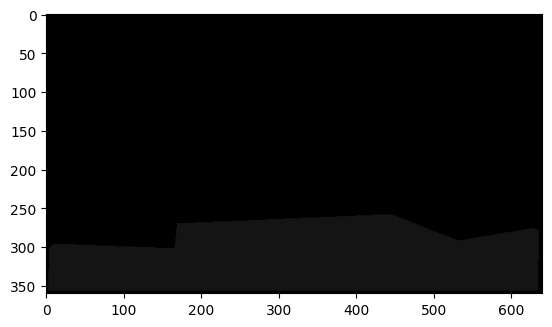

In [68]:
plt.imshow(x*20)

In [58]:
a = cv2.imread('/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/gtFine/1_label_gtFine_labelIds.png')

In [63]:
a[:,:,2].max()

128

In [69]:
b = cv2.imread('/home/kemove/delta_project/Sementic_segmentation/semantic-segmentation/data/bdd100k/label/val/b1c81faa-3df17267.png')

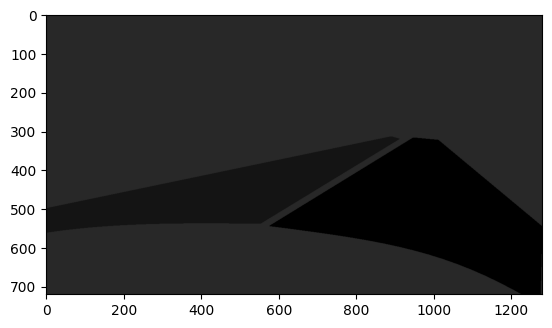

In [73]:
plt.imshow(b*20)